In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade pip

In [3]:
!pip install --upgrade pip setuptools wheel

In [4]:
!pip show setuptools

Name: setuptools
Version: 75.4.0
Summary: Easily download, build, install, upgrade, and uninstall Python packages
Home-page: 
Author: 
Author-email: Python Packaging Authority <distutils-sig@python.org>
License: 
Location: c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: 


In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [13]:

data = pd.read_csv('Dataset-Praktikum (2).csv')
print('df')

df


EDA

In [5]:
data.drop(columns='IDPelanggan', inplace=True)

In [6]:
data.shape

(200, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Kelamin                     200 non-null    object
 1   Usia                        200 non-null    int64 
 2   Pendapatan (juta Rp)        200 non-null    int64 
 3   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
data.isnull().sum()

Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [10]:
data.describe(include=['object'])

,Kelamin
count,200
unique,2
top,Perempuan
freq,112


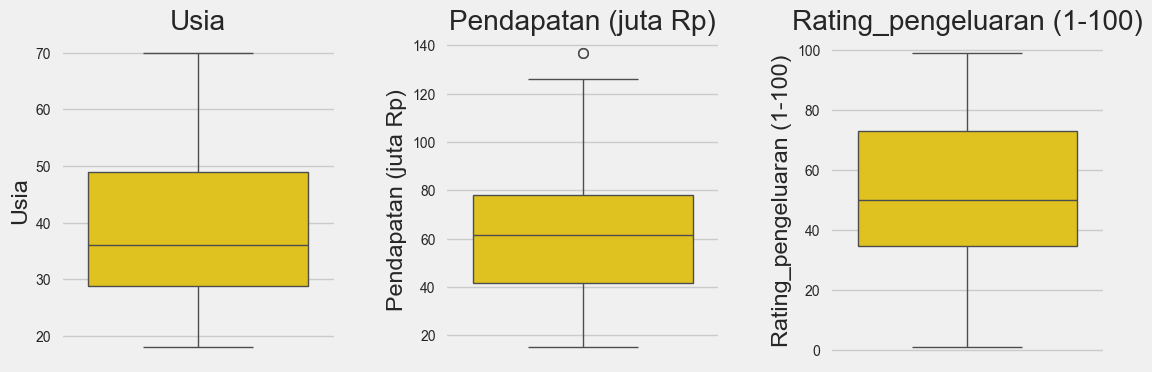

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    # Definisikan variabel yang akan divisualisasikan
    variables = data.select_dtypes(exclude='object').columns

    # Buat figure dan axes untuk subplot dengan ukuran 1x3
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Sesuaikan ukuran figure
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Atur jarak antar subplot

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="gold", ax=axes[i])  # Perhatikan perubahan di sini
        axes[i].set_title(var)  # Tambahkan judul untuk setiap plot

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan data yang sesuai
box_plot(data)

Pre-Processing

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [22]:
# instantiate
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.        , 0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 0.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 1.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 1.        , 0.25      , 0.01639344, 0.39795918],
       [0.02512563, 1.        , 0.07692308, 0.01639344, 0.76530612],
       [0.03015075, 1.        , 0.32692308, 0.02459016, 0.05102041],
       [0.03517588, 1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.04020101, 0.        , 0.88461538, 0.03278689, 0.02040816],
       [0.04522613, 1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.05025126, 0.        , 0.94230769, 0.03278689, 0.13265306],
       [0.05527638, 1.        , 0.32692308, 0.03278689, 1.        ],
       [0.06030151, 1.        , 0.76923077, 0.04098361, 0.14285714],
       [0.06532663, 1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.07035176, 0.        , 0.

MODELLING


1. K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

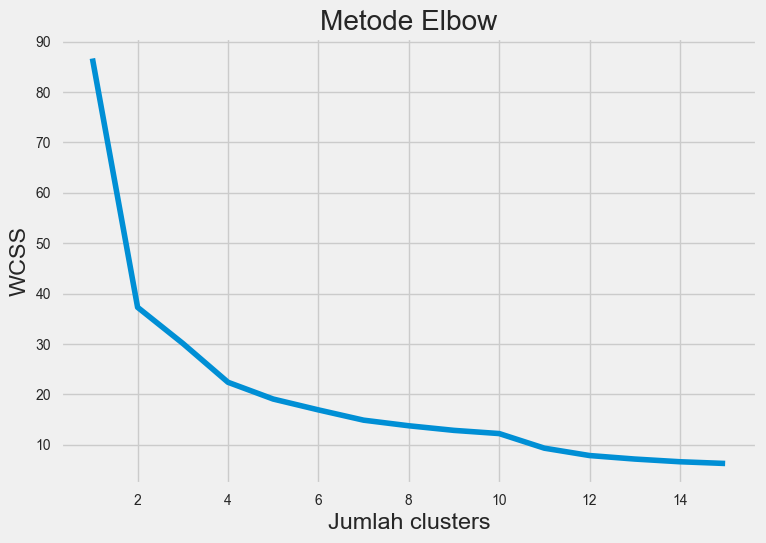

In [26]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show

In [28]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


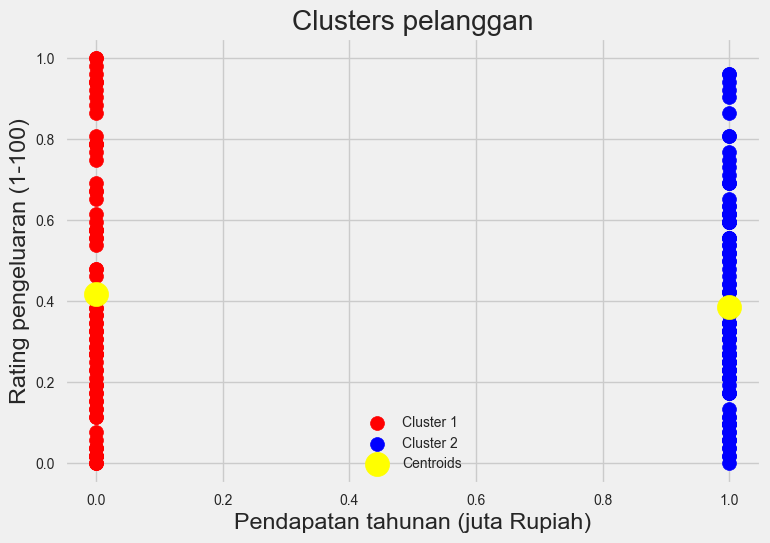

In [20]:
# Visualisasi hasil clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters pelanggan')
plt.xlabel('Pendapatan tahunan (juta Rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

2. DB-Scan

In [24]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=1,min_samples=10)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [25]:
data['Hasil_cluster'] = model2.labels_
data.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,1
3,4,1,23,16,77,1
4,5,1,31,17,40,1


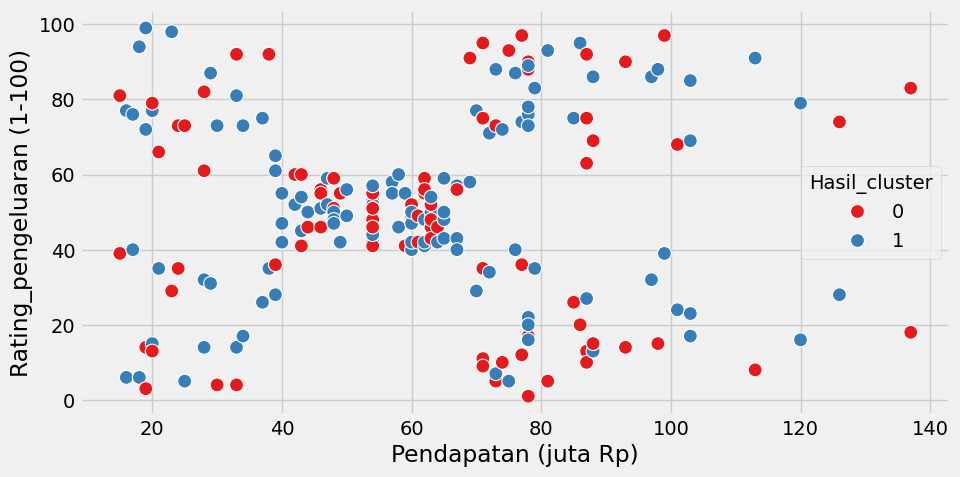

In [66]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x = 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s=100); 

MATRIKS EVALUASI

1. Silhouette_score

In [67]:
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("silhouette_score:", Evaluasi_KMeans)

silhouette_score: 0.5194624832665107


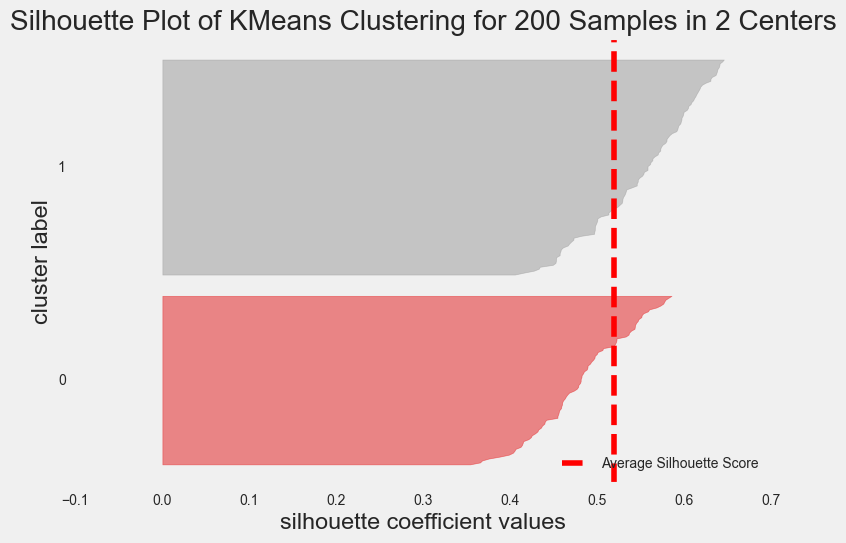

In [22]:
# Membuat silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [7]:
from sklearn.metrics import silhouette_score


In [26]:
# Menghitung Silhouette_score algoritma db-scan
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print("Silhouette Score:", Evaluasi_DBScan)

Silhouette Score: 0.45157033770569127


2. Davies-Bouldin Index (DBI)

In [29]:
# Menghitung Davies-Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.9804250615913864


In [30]:
# Menghitung Davies-Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.9804250615913864
